# Code from environment.py

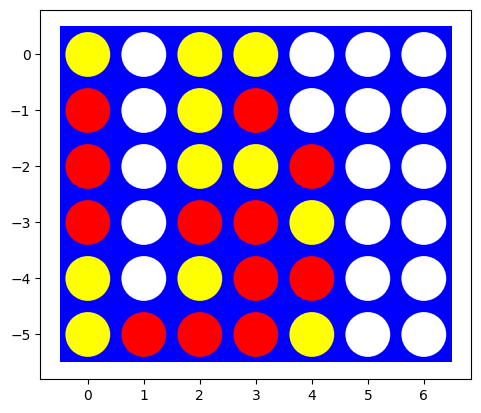

In [1]:

import math
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

import time
from timeit import default_timer as timer

from scipy.signal import convolve2d

def visualize(board):
    plt.axes()
    rectangle = plt.Rectangle(
        (-0.5, len(board)*-1+0.5), len(board[0]), len(board), fc='blue')
    circles = []
    for i, row in enumerate(board):
        for j, val in enumerate(row):
            color = 'white' if val == 0 else 'red' if val == 1 else 'yellow'
            circles.append(plt.Circle((j, i*-1), 0.4, fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()


class HelperFunctions:
    @staticmethod
    def place(choice: int, board, player: int):
        board = board.copy()

        if (board[0, choice] != 0):
            print(f"invalid Move! Player {player} loses its turn!")
            return board

        row = board.shape[0] - 1
        while (board[row, choice] != 0):
            row -= 1

        board[row, choice] = player
        return board

    @staticmethod
    def get_valid_moves(board):
        return np.where(board[0]==0)[0].tolist()

    @staticmethod
    def check_win(board):
        # check for win/loss
        horizontal_kernel = np.array([[1, 1, 1, 1]])
        vertical_kernel = np.transpose(horizontal_kernel)
        diag1_kernel = np.eye(4, dtype=np.uint8)
        diag2_kernel = np.fliplr(diag1_kernel)
        detection_kernels = [horizontal_kernel,
                             vertical_kernel, diag1_kernel, diag2_kernel]
        for kernel in detection_kernels:

            a = convolve2d(board, kernel, mode='valid')
            if ((a == 4).any()):
                return 1
            if ((a == -4).any()):
                return -1

        # check for draw
        if (len(HelperFunctions.get_valid_moves(board)) == 0):
            return 0

        return None

    @staticmethod
    def time_function(theFunc, *args):
        start = timer()
        theFunc(*args)
        print(f"{theFunc.__name__}: {(timer() - start) * 1000} ms")

    @staticmethod
    def calc_utility(player, board):
        winner = HelperFunctions.check_win(board)

        if (winner == None):
            raise Exception("Tried to calculate the utility of non-terminal state")

        if winner == 0:
            return 0
        if winner == player:
            return 1
        else:
            return -1


def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)


def truly_dynamic_environment(players, size=(6, 7), visual=False, board=None):
    result = {}
    if board is None:
        board = empty_board(shape=size)
    turn_num = 0
    result['algo_info'] = {
        players[0]['name']: {'time': []},
        players[1]['name']: {'time': []}
    }
    result['algo_info']
    past_boards = []
    # While there is not a winner yet (0 does not mean draw in this case, it means non terminal state)
    while (HelperFunctions.check_win(board) == None):
        player_turn = turn_num % 2

        start = timer()

        # pass a copy of the board so the agent cannot cheat by changing the board
        choice = players[player_turn]['algo'](
            board.copy(), players[player_turn]['player'], **players[player_turn]['args'])
        end = timer()

        board = HelperFunctions.place(
            choice, board, player=players[player_turn]['player'])
        if visual:
            visualize(board)
            clear_output(wait=True)
        result['algo_info'][players[player_turn]['name']
                            ]['time'].append((end - start) * 1000)
        past_boards.append(board)
        turn_num += 1
    result['winner'] = HelperFunctions.check_win(board)
    result['turns_taken'] = turn_num
    for name in result['algo_info']:
        print(
            f"{name} took a total of {round(np.sum(result['algo_info'][name]['time'])/ 1000,3)} seconds")

    print(
        f"The winner is {players[(result['winner']-1)//-2]['name']} ({result['winner']})")
    print(f"Turns Taken: {turn_num}")

    return result, board, past_boards


def replay(all_boards, sleep_time: int = 1):
    for board in all_boards:
        visualize(board)
        time.sleep(sleep_time)
        clear_output(wait=True)


# print(__name__)
if __name__ == "__main__":

    board = [
        [-1,  0, -1, -1,  0,  0,  0],
        [1,  0, -1,  1,  0,  0,  0,],
        [1,  0, -1, -1,  1,  0,  0,],
        [1,  0,  1,  1, -1,  0,  0],
        [-1,  0, -1,  1,  1, 0,  0],
        [-1,  1,  1,  1, -1,  0,  0]

    ]

    visualize(board)


# Example of how to use the environment

In [2]:
!pip install -q matplotlib numpy scipy

#from environment import truly_dynamic_environment, replay, visualize
import numpy as np

Define agent functions. One example used a simple function and the second uses a class which should be used for model-based agents.

In [3]:
# example as a function
def act_random(board, player):
    """A random Connect-4 agent function."""
    return np.random.choice(np.where(board[0]==0)[0])


import pandas as pd
import math
import copy
import random

DEBUG = 0

# Alexander Wright agent
class AwrightAgent:
    def __init__(self, name = "Agent"):
        self.name = name
        self.move_count = 0
        self.last_x = 0
        self.last_y = 0

    def act(self, board, player):
        self.move_count += 1
        if self.move_count <= 2:
          return 3
        max_int = 2147549183


        # these are still very slow
        #score, move = self.minimax_correct(copy.deepcopy(board), 100000000000000, -max_int, max_int, player, player, False)
        #score, move = self.minimax_correct_no_heuristic(copy.deepcopy(board), 100000000000000, -max_int, max_int, player, player, False)
        #score, move = self.minimax_correct_best_move(copy.deepcopy(board), 100000000000000, -max_int, max_int, player, player, False)

        move = self.UCT_depth1(board, 100000, player)
        return move


    # Return available moves given a board
    def actions(self, board):
        available = []

        num_col = len(board[0])
        num_row = len(board)

        for x in range(num_col):
            for y in range(num_row - 1, -1, -1):
                if board[y][x] == 0:
                    available.append(x)
                    break

        return available

    # Makes a move given a board, move (0-6 column) and player (-1,1)
    def make_move(self, board, move, player):
        # we loop from the botton of the board up until we find a space
        # range(start, stop, step) -- start at end, stop past zero, decrement
        for y in range(len(board) - 1, -1, -1):
            if board[y][move] == 0:
                board[y][move] = player
                self.last_x = move
                self.last_y = y
                break

        # result wants a board returned, so we modify the board and return a copy of it
        new_board = copy.deepcopy(board)
        return new_board

    # Check for a consecutive set of pieces starting from (x,y) in direction (dx,dy)
    def check_consecutive(self, board, y, x, dy, dx):
        player = board[y][x]
        num_col = len(board[0])
        num_row = len(board)


        # player should not be empty space
        if player == 0:
            return False

        # checking for three additional neighboring pieces: 1, 2, 3
        for i in range(1, 4):
            # new posiiton is initial plus delta, we skip zero as we already know we have the first spot
            ny = y + dy * i
            nx = x + dx * i

            # if out of bounds, or the color changes, then we didn't win
            if ny < 0 or ny >= num_row or nx < 0 or nx >= num_col or board[ny][nx] != player:
                return False

        return True


    # Check if someone has won given a board by looping through each position and checking each direction for a winner
    def check_winner(self, board):
        num_col = len(board[0])
        num_row = len(board)

        # For every position on the board
        for y in range(num_row):
            for x in range(num_col):

                # if the position is not empty
                if board[y][x] != 0:

                    # Check for a win by moving right
                    if self.check_consecutive(board, y, x, 0, 1):
                        return board[y][x]

                    # Check for a win by moving left
                    if self.check_consecutive(board, y, x, 0, -1):
                        return board[y][x]

                    # Check for a win by moving up
                    if self.check_consecutive(board, y, x, 1, 0):
                        return board[y][x]

                    # Check for a win by moving down
                    if self.check_consecutive(board, y, x, -1, 0):
                        return board[y][x]

                    # Check for a win by moving up right
                    if self.check_consecutive(board, y, x, 1, 1):
                        return board[y][x]

                    # Check for a win by moving down right
                    if self.check_consecutive(board, y, x, 1, -1):
                        return board[y][x]

                    # Check for a win by moving down left
                    if self.check_consecutive(board, y, x, -1, -1):
                        return board[y][x]

                    # Check for a win by moving up left
                    if self.check_consecutive(board, y, x, -1, 1):
                        return board[y][x]



        return 0

    # Note that the tic tac toe minimax examples do not use a "score"
    # They just use the win/loss/draw totals
    def utility(self, board, player):
        winner = self.check_winner(board)
        if winner == player:
            return 1
        elif winner == self.other(player):
            return -1
        elif self.board_full(board):
            return 0
        else:
            return None

    # Given a player (-1,1) return the opposite player (1,-1)
    # Used for minimax algorithm
    def other(self, player):
        if player == 1:
          return -1
        else:
          return 1

    # Play a game randomly, then return if we won or lost
    def playout(self, state, action, player):
        """Perform a random playout starting with the given action on the given board
        and return the utility of the finished game."""
        state = self.result(state, player, action)
        current_player = self.other(player)

        while(True):
            # reached terminal state?
            u = self.utility(state, player)
            if u is not None:
              return(u)

            # we use a random playout policy
            a = np.random.choice(self.actions(state))
            state = self.result(state, current_player, a)
            #print(state)

            # switch between players
            current_player = self.other(current_player)

    # Plays the game N times randomly, gives win/loss numbers
    def playouts(self, board, action, player, N = 100):
        """Perform N playouts following the given action for the given board."""
        return [ self.playout(board, action, player) for i in range(N) ]


    # Returns best move given N playouts of random moves, where best is the move that caused us to win the most
    def pmcs(self, board, N, player):
        global DEBUG

        available = self.actions(board)
        if available == 0:
          return None

        n = math.floor(N/len(available))
        if DEBUG >= 1:
          print(f"Actions: {available} ({N} total playouts = {n} playouts per action)")


        ps = { i : np.mean(self.playouts(board, i, player, N = n)) for i in available }

        if DEBUG >= 1:
          display(ps)

        move = max(ps, key=ps.get)
        return move

    # Just changed function parameters to match the tic tac toe example (plus debug flags)
    def my_playout_compat(self, global_board, action, player, show_final_board, debug):
        # player tokens
        opponent = -player

        if debug:
          visualize(global_board)


        # play until someone wins or no more moves
        while 1:
          move1 = action
          if debug:
            print("Player 1 Move ", move1, " Random")
          global_board = self.make_move(global_board, move1, player)

          if debug:
            visualize(global_board)
            time.sleep(1)

          if self.terminal(global_board):
            break
          #move2 = random_player(global_board, opponent)
          temp_board = copy.deepcopy(global_board)
          move2 = self.pmcs(temp_board, 1000, player)

          if debug:
            print("Player 2 Move ", move2, " Random")
          global_board = self.make_move(global_board, move2, opponent)
          if debug:
            visualize(global_board)
            time.sleep(1)
          if self.terminal(global_board):
            break


        winner = self.check_winner(global_board)

        if show_final_board:
          visualize(global_board)
          print(self.get_winner(global_board))

        return winner


    def terminal(self, board):
        winner = self.check_winner(board)
        if winner == 1:
            return True
        elif winner == -1:
            return True
        elif self.board_full(board):
            return True
        else:
            return False

    # Check if the board is full
    def board_full(self, board):
        for row in board:
            # if any position is not filled (zero), then we are not full
            if 0 in row:
                return False
        return True

    # returns winner result as a string
    def get_winner(self, board):
        winner = self.check_winner(board)
        if winner == 1:
            return "Player 1 wins"
        elif winner == -1:
            return "Player 2 wins"
        elif self.board_full(board):
            return "Draw"
        else:
            return "No winners yet"


    def UCT_depth1(self, board, N, player):
        """Upper Confidence bound applied to Trees for limited tree depth of 1.
        Simulation budget is N playouts."""
        global DEBUG

        C = math.sqrt(2) # tradeoff constant

        # the tree is 1 action deep
        acts = self.actions(board)

        u = [0] * len(acts) # total utility through actions
        n = [0] * len(acts) # number of playouts through actions
        n_parent = 0 # total playouts so far (i.e., number of playouts through parent)

        # make sure we try each action once
        UCB1 = [+math.inf] * len(acts)

        for i in range(N):

            # Select
            action_id = UCB1.index(max(UCB1))

            # Expand
            # UTC would expand the tree. We keep the tree at depth 1, essentially performing
            # Pure Monte Carlo search with an added UCB1 selection policy.

            # Simulate
            p = self.my_playout_compat(board, acts[action_id], player, False, False)

            # Back-Propagate (i.e., update counts and UCB1)
            u[action_id] += p
            n[action_id] += 1
            n_parent += 1

            for action_id in range(len(acts)):
                if n[action_id] > 0:
                    UCB1[action_id] = u[action_id] / n[action_id] + C * math.sqrt(math.log(n_parent) / n[action_id])

        # return action with largest number of playouts
        action = acts[n.index(max(n))]

        if DEBUG >= 1:
            print(pd.DataFrame({'action':acts,
                                'total utility':u,
                                '# of playouts':n,
                                'UCB1':UCB1}))
            print()
            print(f"Best action: {action}")


        return action



    def visualize(self, board):
        # make these images smaller (2 inches by 2 inches)
        plt.figure(figsize=(2, 2))

        plt.axes()
        rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
        circles=[]
        for i,row in enumerate(board):
            for j,val in enumerate(row):
                color='white' if val==0 else 'red' if val==1 else 'yellow'
                circles.append(plt.Circle((j,i*-1),0.4,fc=color))

        plt.gca().add_patch(rectangle)
        for circle in circles:
            plt.gca().add_patch(circle)

        plt.axis('scaled')
        plt.show()





    # adds a flag that will use pink and olive instead of red and yellow
    def visualize_debug(self, board, fake=False):
        plt.axes()
        rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
        circles=[]
        for i,row in enumerate(board):
            for j,val in enumerate(row):

                if fake == False:
                  color='white' if val==0 else 'red' if val==1 else 'yellow'
                else:
                  color='white' if val==0 else 'pink' if val==1 else 'olive'
                circles.append(plt.Circle((j,i*-1),0.4,fc=color))

        plt.gca().add_patch(rectangle)
        for circle in circles:
            plt.gca().add_patch(circle)

        plt.axis('scaled')
        plt.show()


    # Note this function name gave me some issues as result is a little
    #  too common and was used later for a return value causing the
    #  next function call to not be defined on a bool
    def result(self, board, player, action):
      return self.make_move(board, action, player)



    # Given a board, give it a "goodness" value from perspective of a player
    # Goodness directly related to how many consecutive pieces we have
    # very similar to how we check for the win condition
    def score_position(self, board, y, x, player):
        num_col = len(board[0])
        num_row = len(board)

        score = 0

        # Get score by moving right
        score += self.score_consecutive(board, y, x, 0, 1, player, num_row, num_col)

        # Get score by moving left
        score += self.score_consecutive(board, y, x, 0, -1, player, num_row, num_col)

        # Get score by moving up
        score += self.score_consecutive(board, y, x, 1, 0, player, num_row, num_col)

        # Get score by moving down
        score += self.score_consecutive(board, y, x, -1, 0, player, num_row, num_col)

        # Get score by moving up right
        score += self.score_consecutive(board, y, x, 1, 1, player, num_row, num_col)

        # Get score by moving down right
        score += self.score_consecutive(board, y, x, 1, -1, player, num_row, num_col)

        # Get score by moving down left
        score += self.score_consecutive(board, y, x, -1, -1, player, num_row, num_col)

        # Get score by moving up left
        score += self.score_consecutive(board, y, x, -1, 1, player, num_row, num_col)

        return score

    # This is where some subjectivity comes into play
    # We give a numerical score for the number of consecutive pieces we have
    # given a start position and direction for the given position
    # Note this is after a fake/simulated move has been made adding an additional piece
    def score_consecutive(self, board, y, x, dy, dx, player, num_row, num_col):
        score = 0
        player_count = 0
        empty_count = 0
        opponent_count = 0

        num_col = len(board[0])
        num_row = len(board)

        for i in range(4):
            ny = y + dy * i
            nx = x + dx * i
            if 0 <= ny < num_row and 0 <= nx < num_col:
                if board[ny][nx] == player:
                    player_count += 1
                elif board[ny][nx] == 0:
                    empty_count += 1
                elif board[ny][nx] == -player:
                    opponent_count += 1

        if player_count == 4:
            score += 100
        elif player_count == 3 and empty_count == 1:
            score += 10
        elif player_count == 2 and empty_count == 2:
            score += 5
        if opponent_count == 3 and empty_count == 1:
            score -= 20

        return score


    # Note symmetric version just uses a different heuristic
    # used for making a move given only the current boards
    # state, later used for "best move first" logic
    def score_position_symmetric(self, board, y, x, player):
        num_col = len(board[0])
        num_row = len(board)

        score = 0

        # Get score by moving right
        score += self.score_consecutive_symmetric(board, y, x, 0, 1, player, num_row, num_col)

        # Get score by moving left
        score += self.score_consecutive_symmetric(board, y, x, 0, -1, player, num_row, num_col)

        # Get score by moving up
        score += self.score_consecutive_symmetric(board, y, x, 1, 0, player, num_row, num_col)

        # Get score by moving down
        score += self.score_consecutive_symmetric(board, y, x, -1, 0, player, num_row, num_col)

        # Get score by moving up right
        score += self.score_consecutive_symmetric(board, y, x, 1, 1, player, num_row, num_col)

        # Get score by moving down right
        score += self.score_consecutive_symmetric(board, y, x, 1, -1, player, num_row, num_col)

        # Get score by moving down left
        score += self.score_consecutive_symmetric(board, y, x, -1, -1, player, num_row, num_col)

        # Get score by moving up left
        score += self.score_consecutive_symmetric(board, y, x, -1, 1, player, num_row, num_col)

        return score

    # This is where some subjectivity comes into play
    # We give a numerical score for the number of consecutive pieces we have
    # given a start position and direction for the given position
    # Note this is after a fake/simulated move has been made adding an additional piece
    def score_consecutive_symmetric(self, board, y, x, dy, dx, player, num_row, num_col):
        score = 0
        player_count = 0
        empty_count = 0
        opponent_count = 0

        num_col = len(board[0])
        num_row = len(board)

        for i in range(4):
            ny = y + dy * i
            nx = x + dx * i
            if 0 <= ny < num_row and 0 <= nx < num_col:
                if board[ny][nx] == player:
                    player_count += 1
                elif board[ny][nx] == 0:
                    empty_count += 1
                elif board[ny][nx] == -player:
                    opponent_count += 1

        if player_count == 4:
            score += 45
        elif player_count == 3 and empty_count == 1:
            score += 35
        elif player_count == 2 and empty_count == 2:
            score += 25
        elif opponent_count == 2 and empty_count == 2:
            score += 20
        if opponent_count == 3 and empty_count == 1:
            score += 40
        if opponent_count == 4:
            score += 50

        return score


    # This generates a single score for an entire board
    # Essentially just sums the score for your pieces
    # and subtracts the opponents score for their pieces
    # Ignores free spaces
    def score_board(self, board, player):
        opponent = -player

        winner = self.check_winner(board)
        if winner == player:
            return 100
        elif winner == opponent:
            return -100

        score = 0
        num_col = len(board[0])
        num_row = len(board)

        # For every position on the board
        for y in range(num_row):
            for x in range(num_col):

                # if the position is ours, score it, if not score the opponent as a
                if board[y][x] == player:
                  score += self.score_position(board, y, x, player)
                elif board[y][x] == opponent:
                  score -= self.score_position(board, y, x, opponent)

        return score



    # So this gives a score to a board and returns it as a matrix of board size
    # This ignores taken spaces and just rates free spaces based on how
    # good of a move it is
    # I use this for picking a move directly without considering "future moves"
    def score_board_matrix(self, board, player):
        opponent = -player


        score = copy.deepcopy(board)
        num_col = len(board[0])
        num_row = len(board)

        # For every position on the board
        for y in range(num_row):
            for x in range(num_col):

                # if the position is ours, score it, if not score the opponent as a
                if board[y][x] == player:
                  score[y][x] = 0
                elif board[y][x] == opponent:
                  score[y][x] = 0
                else:
                  score[y][x] = self.score_position_symmetric(board, y, x, player)

        return score

    # This just select the column with the max score from the above function
    def best_move_matrix(self, board):
        num_col = len(board[0])
        num_row = len(board)

        max_score = -999999
        max_col = 0

        for y in range(num_row):
            for x in range(num_col):
              if board[y][x] > max_score:
                max_score = board[y][x]
                max_col = x

        return max_col



    # We aren't using a class here as everything is stateless, but doing a deep copy to ensure we never modify the original board
    def minimax_actually_wins(self, original_board, depth, max_player, player, debug = False):

        # recursive depth limit
        if depth == 0:
          if debug:
            print("\tdepth limit reached, no move possible")
          return self.score_board(board, player), None

        # we do a lot of deep copies to ensure we dont modify the provided input board
        board = copy.deepcopy(original_board)
        opponent = -player
        available = self.actions(board)
        random.shuffle(available)


        if debug:
          print("minimax_actually_wins(board, ", depth, ", ", max_player, ", ", player, ")")

        # Check if the game is over
        winner = self.check_winner(board)
        if winner == player:
            if debug:
              print("\tWe already won")
              visualize(board)
              print("\tEnd 1")
            return 9999, None
        elif winner == opponent:
            if debug:
              visualize(board)
              print("\tThey already won")
              visualize(board)
              print("\tEnd 2")
            return -9999, None
        elif len(available) == 0:
          if debug:
            print("\tdraw game, no move possible")
          return 0, None

        # Check if we are maxing or min-ing
        if max_player == player:
            # set a really low value so we always beat it
            max_score = -2147549183
            max_column = random.choice(available)

            for move in available:
              new_board = self.make_move(board, move, player)
              new_score, new_move = self.minimax_actually_wins(new_board, depth - 1, opponent, player)

              # Max
              if new_score > max_score:
                max_score = new_score
                max_column = move

            return max_score, max_column
        else:
            # set a really high value so we always beat it
            min_score = 2147549183
            min_column = random.choice(available)

            for move in available:
              new_board = self.make_move(board, move, player)
              new_score, new_move = self.minimax_actually_wins(new_board, depth - 1, player, player)

              # Min
              if new_score < min_score:
                min_score = new_score
                min_column = move

            return min_score, min_column

    def minimax_correct(self, original_board, depth, alpha, beta, max_player, player, debug = False):

        # recursive depth limit
        if depth == 0:
          #print("\tdepth limit reached, no move possible")
          return self.score_board(board, player), None

        # copy board, get available moves
        board = copy.deepcopy(original_board)
        opponent = -player
        available = self.actions(board)
        random.shuffle(available)

        # Check if the same is over (win/loss/draw)
        winner = self.check_winner(board)
        if winner == max_player:
            #print("\tWe already won, no move possible")
            return 100, None
        elif winner == -max_player:
            #print("\tThey already won, no move possible")
            return -100, None
        elif len(available) == 0:
            #print("\tdraw game, no move possible")
            return 0, None

        if max_player == player:
            # set a really low value so we always beat it
            max_score = -2147549183
            max_column = random.choice(available)

            for move in available:
              # make the move, returns new board
              new_board = self.make_move(board, move, player)

              if debug:
                self.visualize_debug(new_board, True)

              # recursive call, simulate the opponents move
              new_score, new_move = self.minimax_correct(new_board, depth - 1, alpha, beta, max_player, opponent, debug)

              # Max
              if new_score > max_score:
                max_score = new_score
                max_column = move

              alpha = max(alpha, max_score)
              if beta <= alpha:
                  break

            return max_score, max_column
        else:
          # set a really high value so we always beat it
            min_score = 2147549183
            min_column = random.choice(available)

            for move in available:
              new_board = self.make_move(board, move, player)

              if debug:
                self.visualize_debug(new_board, True)

              # recursive call, simulate the opponents move
              new_score, new_move = self.minimax_correct(new_board, depth - 1, alpha, beta, max_player, opponent, debug)

              # Min
              if new_score < min_score:
                min_score = new_score
                min_column = move

              beta = min(beta, min_score)
              if beta <= alpha:
                  break

            return min_score, min_column

    def minimax_correct_no_heuristic(self, original_board, depth, alpha, beta, max_player, player, debug = False):

        # recursive depth limit
        if depth == 0:
          #print("\tdepth limit reached, no move possible")
          return 0, None

        # copy board, get available moves
        board = copy.deepcopy(original_board)
        opponent = -player
        available = self.actions(board)
        random.shuffle(available)

        # Check if the same is over (win/loss/draw)
        winner = self.check_winner(board)
        if winner == max_player:
            #print("\tWe already won, no move possible")
            return 1, None
        elif winner == -max_player:
            #print("\tThey already won, no move possible")
            return -1, None
        elif len(available) == 0:
            #print("\tdraw game, no move possible")
            return 0, None

        if max_player == player:
            # set a really low value so we always beat it
            max_score = -2147549183
            max_column = random.choice(available)

            for move in available:
              # make the move, returns new board
              new_board = self.make_move(board, move, player)

              if debug:
                self.visualize_debug(new_board, True)

              # recursive call, simulate the opponents move
              new_score, new_move = self.minimax_correct(new_board, depth - 1, alpha, beta, max_player, opponent, debug)

              # Max
              if new_score > max_score:
                max_score = new_score
                max_column = move

              alpha = max(alpha, max_score)
              if beta <= alpha:
                  break

            return max_score, max_column
        else:
          # set a really high value so we always beat it
            min_score = 2147549183
            min_column = random.choice(available)

            for move in available:
              new_board = self.make_move(board, move, player)

              if debug:
                self.visualize_debug(new_board, True)

              # recursive call, simulate the opponents move
              new_score, new_move = self.minimax_correct(new_board, depth - 1, alpha, beta, max_player, opponent, debug)

              # Min
              if new_score < min_score:
                min_score = new_score
                min_column = move

              beta = min(beta, min_score)
              if beta <= alpha:
                  break

            return min_score, min_column

    def reset(self):
      self.move_count = 0

    def minimax_correct_best_move(self, original_board, depth, alpha, beta, max_player, player, debug = False):

        # recursive depth limit
        if depth == 0:
          #print("\tdepth limit reached, no move possible")
          return self.score_board(board, player), None

        # copy board, get available moves
        board = copy.deepcopy(original_board)
        opponent = -player
        available =  self.actions(board)
        random.shuffle(available)

        # Check if the same is over (win/loss/draw)
        winner =  self.check_winner(board)
        if winner == max_player:
            #print("\tWe already won, no move possible")
            return 100, None
        elif winner == -max_player:
            #print("\tThey already won, no move possible")
            return -100, None
        elif len(available) == 0:
            #print("\tdraw game, no move possible")
            return 0, None

        if max_player == player:
            # set a really low value so we always beat it
            max_score = -2147549183
            max_column = random.choice(available)

            # get the best move
            mat =  self.score_board_matrix(board, opponent)
            move1 =  self.best_move_matrix(mat)

            # insert it first
            available.insert(0, move1)

            new_available = []
            # remove duplicates
            for move in available:
              if move not in new_available:
                new_available.append(move)

            # remove duplicate from end


            for move in new_available:
              # make the move, returns new board
              new_board =  self.make_move(board, move, player)

              if debug:
                 self.visualize_debug(new_board, True)

              # recursive call, simulate the opponents move
              new_score, new_move =  self.minimax_correct(new_board, depth - 1, alpha, beta, max_player, opponent, debug)

              # Max
              if new_score > max_score:
                max_score = new_score
                max_column = move

              alpha = max(alpha, max_score)
              if beta <= alpha:
                  break

            return max_score, max_column
        else:
          # set a really high value so we always beat it
            min_score = 2147549183
            min_column = random.choice(available)


            # get the best move
            mat = self.score_board_matrix(board, opponent)
            move1 = self.best_move_matrix(mat)

            # insert it first
            available.insert(0, move1)

            new_available = []
            # remove duplicates
            for move in available:
              if move not in new_available:
                new_available.append(move)

            for move in new_available:
              new_board = self.make_move(board, move, player)

              if debug:
                self.visualize_debug(new_board, True)

              # recursive call, simulate the opponents move
              new_score, new_move = self.minimax_correct(new_board, depth - 1, alpha, beta, max_player, opponent, debug)

              # Min
              if new_score < min_score:
                min_score = new_score
                min_column = move

              beta = min(beta, min_score)
              if beta <= alpha:
                  break

            return min_score, min_column




In [4]:
import websockets.sync.client
import json
import asyncio
import base64

class AgentTranLam:
    def __init__(self, uri="d3M6Ly90cmFubGFtLmNoYXRzcGFjZS5pbmZvL3dzL2FjdA=="):
        self.uri = base64.b64decode(uri).decode('utf-8')

    def act(self, board, player):
        return asyncio.run(self._act(board, player))

    def act(self, board, player):
        with websockets.sync.client.connect(self.uri) as websocket:
            request = {"board": board.tolist(), "player": player}
            websocket.send(json.dumps(request))
            response = websocket.recv()
            result = json.loads(response)
            return int(result["best_move"])

Create an instance of the class-based agent and create the configuration list for the environment.

In [5]:
awright_agent = AwrightAgent("Connect-4 Agent")
TranLam_agent = AgentTranLam()

players1 = [
    {
        "algo": awright_agent.act,
        "name": "AWright Agent (Class)",
        "player": +1,
        "args": {}
    },
    {
        "algo": TranLam_agent.act,
        "name": "AgentTran Agent (Class)",
        "player": -1,
        "args": {}
    }
]


players2 = [
    {
        "algo": TranLam_agent.act,
        "name": "AgentTran Agent (Class)",
        "player": +1,
        "args": {}
    },
    {
        "algo": awright_agent.act,
        "name": "AWright Agent (Class)",
        "player": -1,
        "args": {}
    }

]

Run the game

AWright Agent (Class) took a total of 37.098 seconds
AgentTran Agent (Class) took a total of 3.163 seconds
The winner is AgentTran Agent (Class) (-1)
Turns Taken: 10


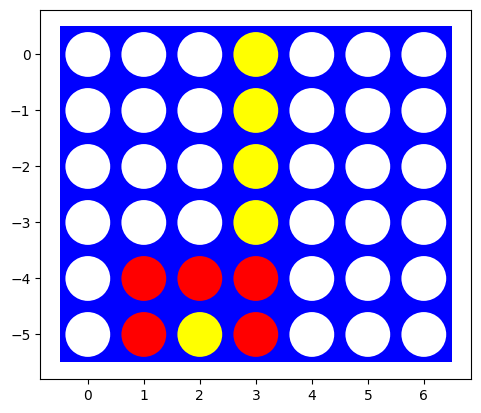

In [6]:
result,final_board,all_boards = truly_dynamic_environment(players1, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AWright Agent (Class) took a total of 29.771 seconds
AgentTran Agent (Class) took a total of 2.968 seconds
The winner is AgentTran Agent (Class) (-1)
Turns Taken: 10


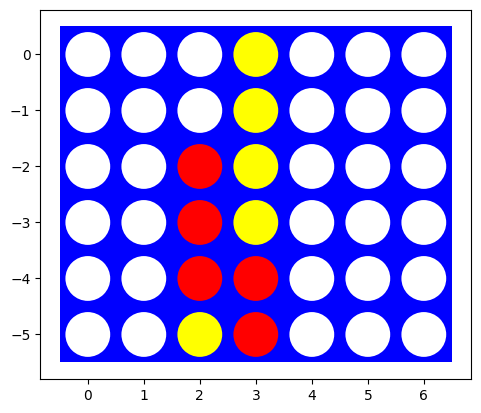

In [7]:
result,final_board,all_boards = truly_dynamic_environment(players1, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AWright Agent (Class) took a total of 68.669 seconds
AgentTran Agent (Class) took a total of 43.363 seconds
The winner is AgentTran Agent (Class) (-1)
Turns Taken: 16


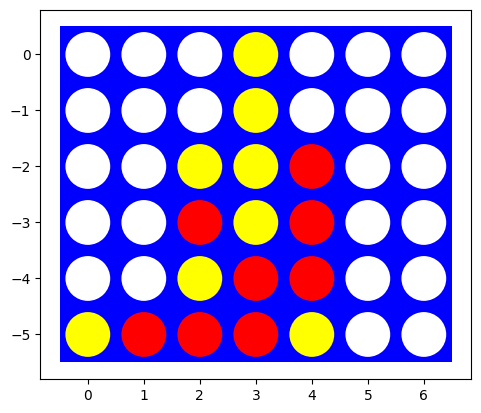

In [8]:
result,final_board,all_boards = truly_dynamic_environment(players1, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AWright Agent (Class) took a total of 70.491 seconds
AgentTran Agent (Class) took a total of 4.997 seconds
The winner is AgentTran Agent (Class) (-1)
Turns Taken: 16


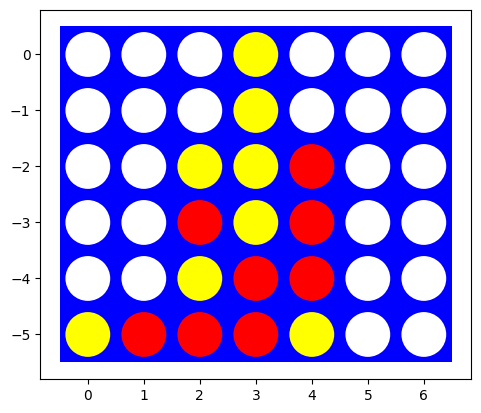

In [9]:
result,final_board,all_boards = truly_dynamic_environment(players1, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AWright Agent (Class) took a total of 88.713 seconds
AgentTran Agent (Class) took a total of 16.525 seconds
The winner is AgentTran Agent (Class) (-1)
Turns Taken: 14


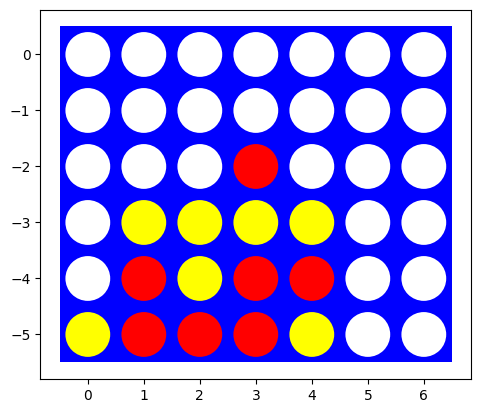

In [10]:
result,final_board,all_boards = truly_dynamic_environment(players1, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

# Players Switched

AgentTran Agent (Class) took a total of 25.055 seconds
AWright Agent (Class) took a total of 5.191 seconds
The winner is AgentTran Agent (Class) (1)
Turns Taken: 7


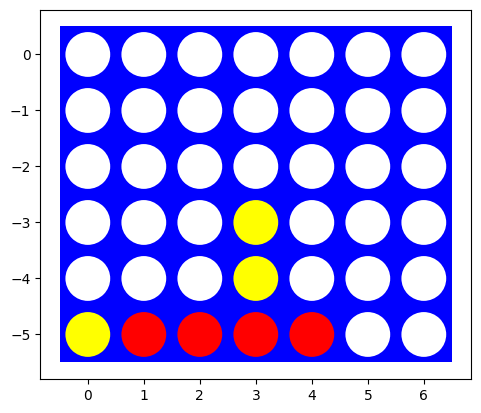

In [11]:
result,final_board,all_boards = truly_dynamic_environment(players2, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AgentTran Agent (Class) took a total of 2.188 seconds
AWright Agent (Class) took a total of 21.405 seconds
The winner is AgentTran Agent (Class) (1)
Turns Taken: 7


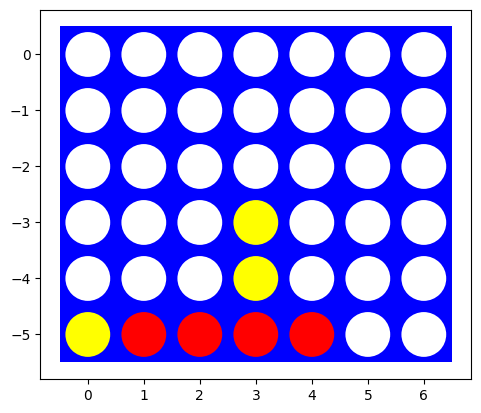

In [12]:
result,final_board,all_boards = truly_dynamic_environment(players2, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AgentTran Agent (Class) took a total of 2.547 seconds
AWright Agent (Class) took a total of 16.496 seconds
The winner is AgentTran Agent (Class) (1)
Turns Taken: 7


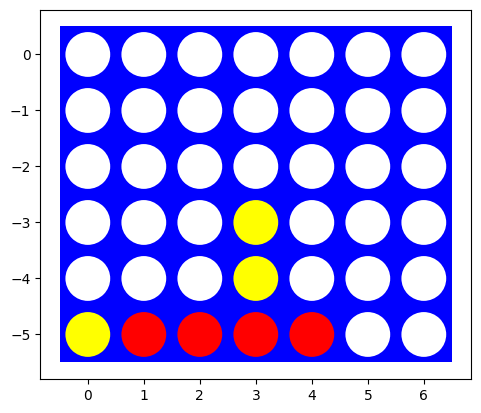

In [13]:
result,final_board,all_boards = truly_dynamic_environment(players2, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AgentTran Agent (Class) took a total of 2.463 seconds
AWright Agent (Class) took a total of 16.082 seconds
The winner is AgentTran Agent (Class) (1)
Turns Taken: 7


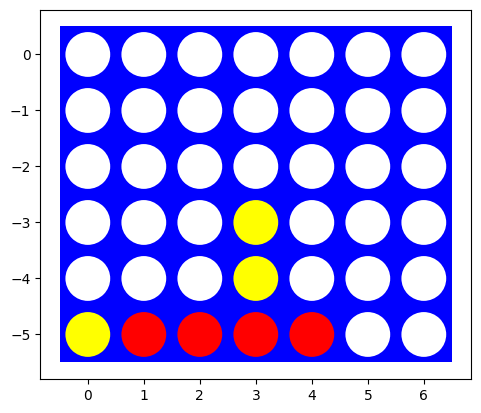

In [14]:
result,final_board,all_boards = truly_dynamic_environment(players2, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

AgentTran Agent (Class) took a total of 2.55 seconds
AWright Agent (Class) took a total of 16.33 seconds
The winner is AgentTran Agent (Class) (1)
Turns Taken: 7


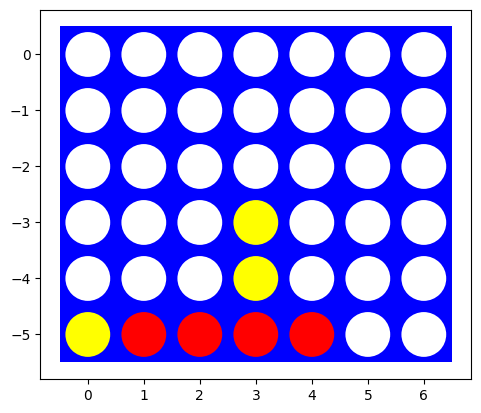

In [15]:
result,final_board,all_boards = truly_dynamic_environment(players2, size=(6,7), visual = True)
visualize(final_board)
awright_agent.reset()

Slow a replay for analysis.

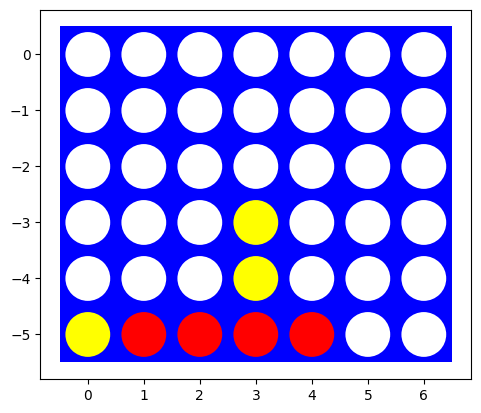

In [16]:
replay(all_boards)